# Example Code

In [8]:
from universe.universe import *
from facts.fact_sheets import planetary_facts, sun_facts
%matplotlib inline

## Example 1: Earth

Here we show basic calculations for a planetary body based solely on mass and radius (e.g., gravitational acceleration).

In [9]:
earth = PlanetaryBody(planetary_facts["Earth"]["mass"],
                      planetary_facts["Earth"]["radius"],
                      name="Earth")
print(earth)

Earth (Planetary Body):
    mass: 5.97e+24 kilograms
    radius: 6378.0 kilometers
    volume: 1086781292542.8892 cubic kilometers
    density: 5493.285577295119 kilograms per cubic meter
    gravitational_acceleration: 9.793240640524946 meters / second squared


We can also calculate the weight of a person on the surface of the planet based on their mass. This won't be an exciting calculation for Earth, but we could easily calculate our weight on Mars.

In [10]:
mars = PlanetaryBody(planetary_facts["Mars"]["mass"], 
                     planetary_facts["Mars"]["radius"],
                     name="Mars")
weight_of_a_person_in_kg = 70
mars.calculate_weight_on_surface(weight_of_a_person_in_kg)

26.53339082889333

## Example 2: the Sun

Solar bodies are similar to planets in some respects, but different in others. As you can see, an average temperature is required, but also us to calculate the Luminosity of the sun.

In [11]:
sol = SolarBody(sun_facts["mass"], sun_facts["radius"],
                sun_facts["mean temperature"], 
                name="Sun")
print(sol)

Sun (Solar Body):
    mass: 1.9885e+30 kilograms
    radius: 695700 kilometers
    volume: 1.410440010853996e+18 cubic kilometers
    density: 1409.8437258568686 kilograms per cubic meter
    gravitational_acceleration: 274.1591301245588 meters / second squared
    Harvard Spectral Classification: G
    luminosity: 3.8436787230494296e+26 Joules / second
    chromaticity: yellowish white


## Example 3: Sagittaius A*

Black holes also exhibit different characteristics. For example, we can calculate the event horizon (i.e., radius) of the black hole using only its mass.

In [12]:
sag_a = BlackHole(sun_facts["mass"] * 4000000, name="Sagittarius A*")
print(sag_a)

Sagittarius A* (Black Hole):
    mass: 7.954e+36 kilograms
    radius: 11811234.751292054 kilometers
    volume: 6.901992979891329e+21 cubic kilometers
    density: 1152420.760666325 kilograms per cubic meter
    gravitational_acceleration: 3804662.2459963425 meters / second squared


## Building a Universe

Now let's see how we can put these component pieces together to construct a universe (here we use the term "universe" to mean any collection of celestial bodies).

First, we instantiate a Universe class.

In [13]:
milky_way = Universe(name="Milky Way")

Then, we need to add our celestial bodies to the universe. We'll also add a few more planets to make the example more complete.

In [15]:
milky_way.add_celestial_body(sag_a)
milky_way.add_celestial_body(sol)
milky_way.add_celestial_body(earth)
milky_way.add_celestial_body(mars)
moon = PlanetaryBody(7.3e+22, 1737.5, name="Moon")
milky_way.add_celestial_body(moon)
mercury = PlanetaryBody(3.3e+23, 2439.5, name="Mercury")
milky_way.add_celestial_body(mercury)
venus = PlanetaryBody(4.87e+24, 6052, name="Venus")
milky_way.add_celestial_body(venus)
mars = PlanetaryBody(6.42e+23, 3396.0, name="Mars")

Let's add some orbital details. Here we use the Orbit class, which requires us to define the primary body, orbiting body, and the semi-major axis and eccentricity of the orbit.

In [16]:
milky_way.add_orbit(Orbit(sag_a, sol, 2.42573e+17, 0.0))
milky_way.add_orbit(Orbit(sol, earth, 1.496e+08, 0.017))
milky_way.add_orbit(Orbit(earth, moon, 3.84e+05, 0.055))
milky_way.add_orbit(Orbit(sol, mercury, 5.79e+07, 0.205))
milky_way.add_orbit(Orbit(sol, venus, 1.082e+08, 0.007))
milky_way.add_orbit(Orbit(sol, mars, 2.279e+08, 0.094))

Finally, we'll plot the orbiting bodies to see what our universe looks like!

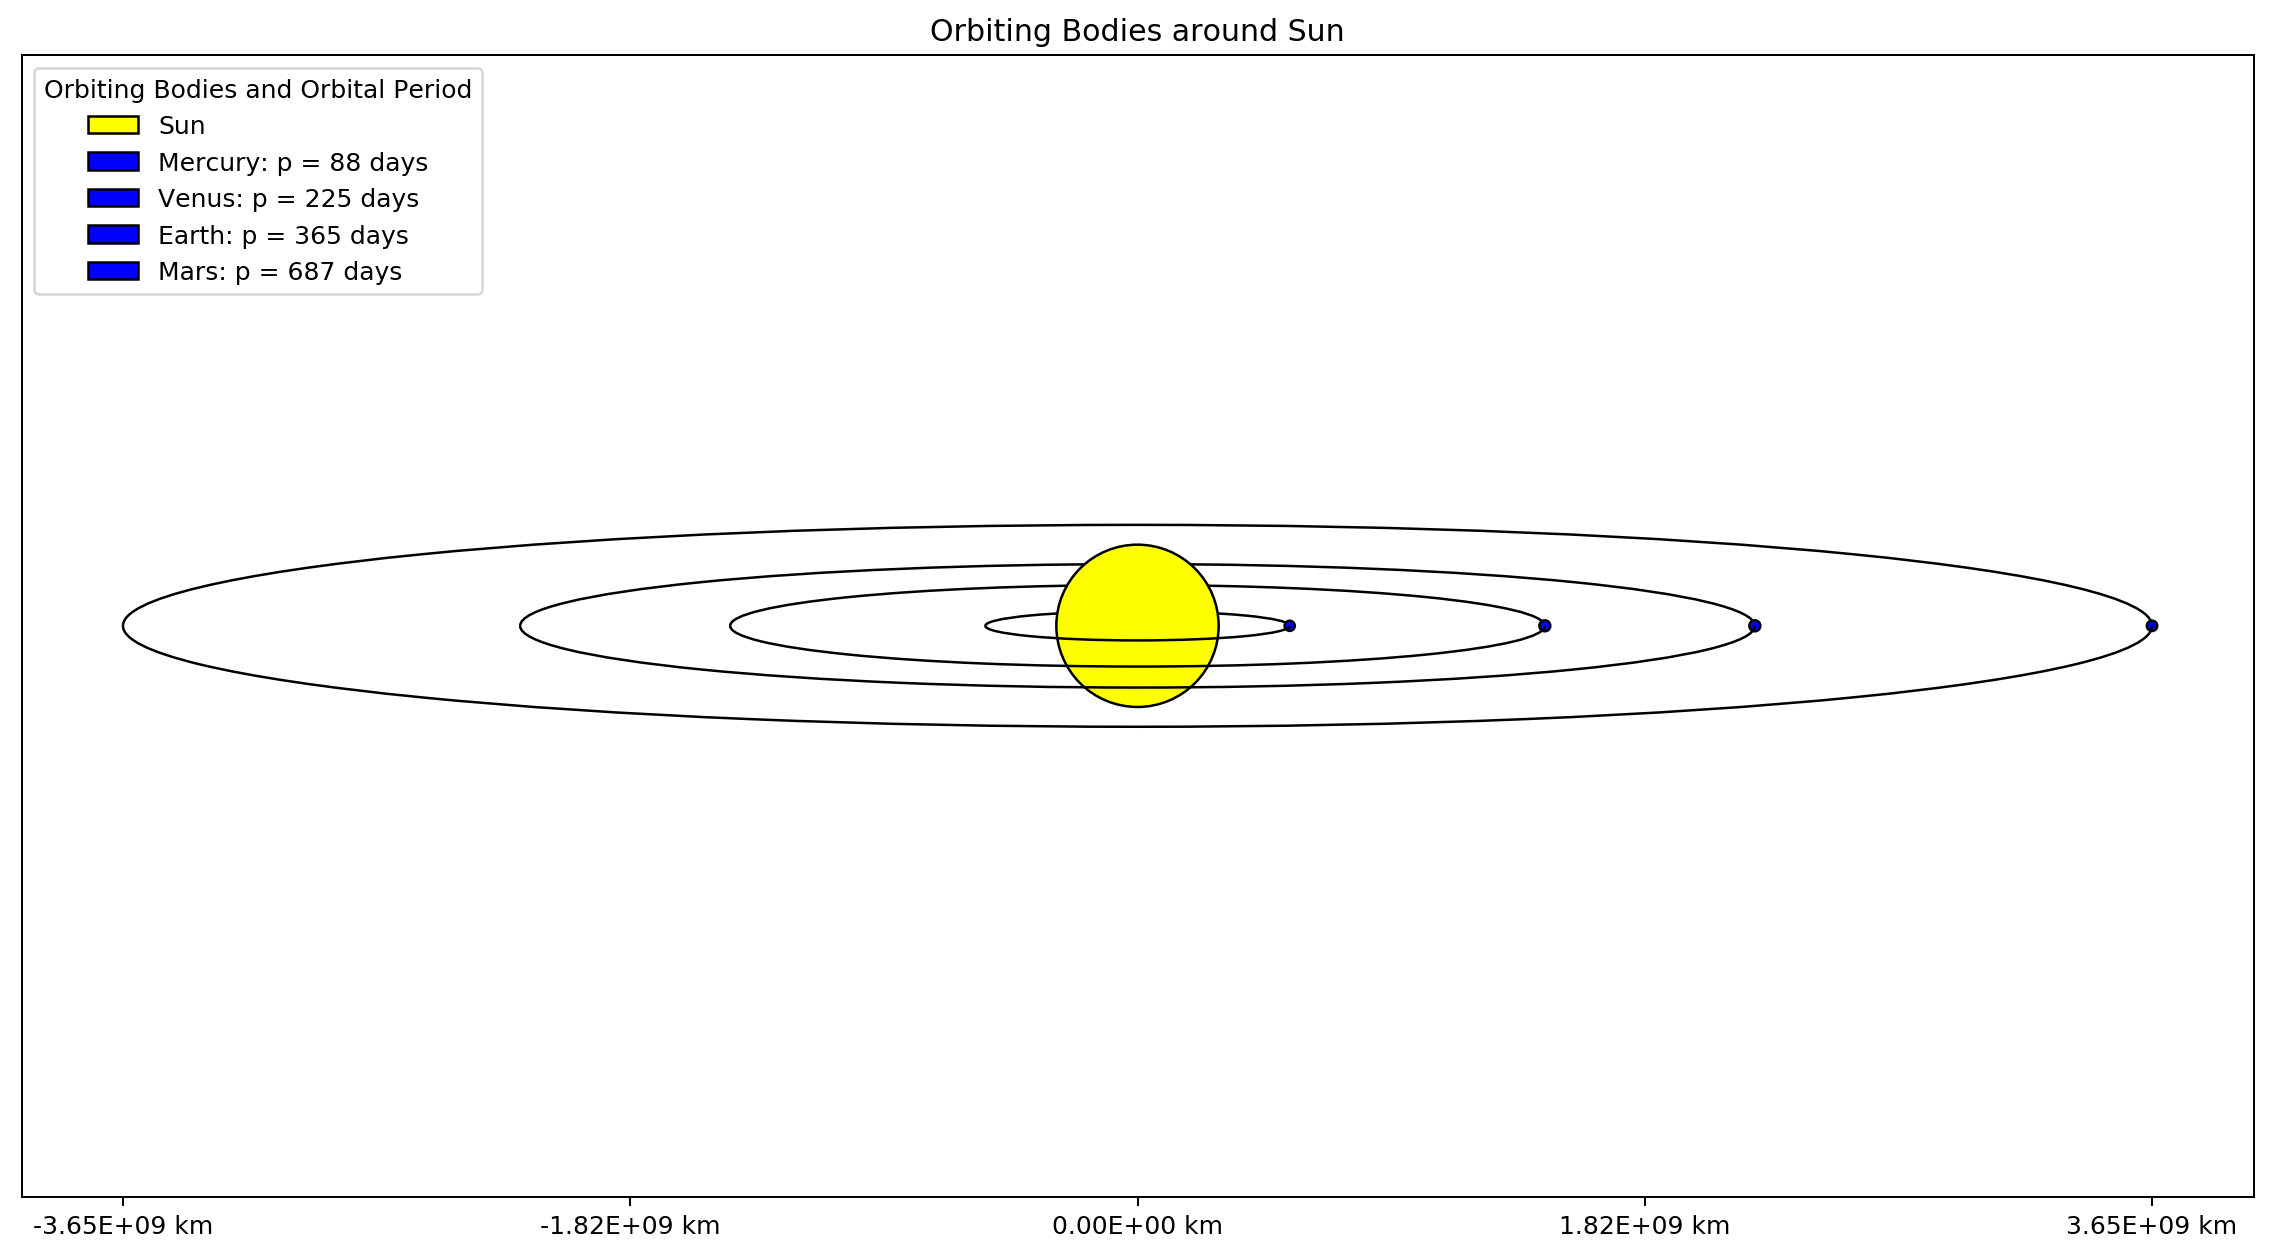

In [17]:
milky_way.plot_orbits("Sun")